<a href="https://colab.research.google.com/github/lim-jr/ESAA-Submits/blob/main/0522%EC%9B%94%EA%B3%BC%EC%A0%9C_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C(50_86)_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 03. 케라스(Keras)

## 01. 딥러닝 준비

텐서플로1 -> 텐서플로2 : 케라스 API를 텐서플로가 내제화, GPU 연산을 수행하는 기능을 직접 실행하지 않고 텐서플로, CNTK 등 백엔드 엔진을 지정하여 사용

### 1-1 주요 용어

#### 1-1-1 하이퍼파라미터

하이퍼파라미터: 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 값, 모델이 훈련하면서 가중치(weights)와 편향(bias)은 자동 업데이트되고 조정되며 알아서 변하는 값들이지만, 그 외에 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값들도 많다.

하이퍼파라미터 튜닝: 하이퍼파라미터 값을 조절하는 행위

#### 1-1-2 과소적합 vs. 과대적합(underfitting vs. overfitting)

모델 훈련 시 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나, 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 모델 학습 후 예측 성능이 현저하게 떨어질 수 있다.

- 과소적합: 모델이 충분히 학습되지 않아 예측 성능이 떨어짐
- 과대적합: 학습 데이터를 지나치게 반복 학습하여 과하게 적합된 상태, 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영(예측 데이터에 대한 예측 오차 발생 확률이 커짐)

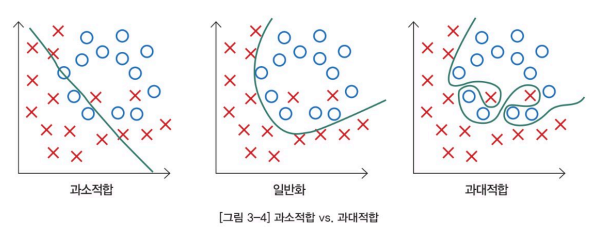

과대적합 및 과소적합 문제를 줄이려면


1.   훈련 데이터와 예측 데이터 분포를 비슷하게 구성
2.   불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소
3.   훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델이 가장 이상적으로 학습된 지점이라 판단하는 방법 이용

#### 1-1-3 에포크(epoch)

에포크: 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 1 epoch라 함

#### 1-1-4 손실함수(loss function)

손실함수: 예측 값과 정답 값의 차이 또는 오차(Error), 사용자가 직접 정의해야 함

- 이진 분류: 손실함수 - binary_crossentropy / activation function - sigmoid
- 다중 분류: 손실함수 - categorical_crossentropy(종속변수가 one-hot vector) / activation function - **softmax**
- 다중 분류인데 one-hot vector가 아닐 때: 손실함수 - sparse_categorical_crossentropy / activation function - **softmax**
- 회귀 모델: 손실함수 - Mean Squared Error, Mean Absolute Error, Huber 등

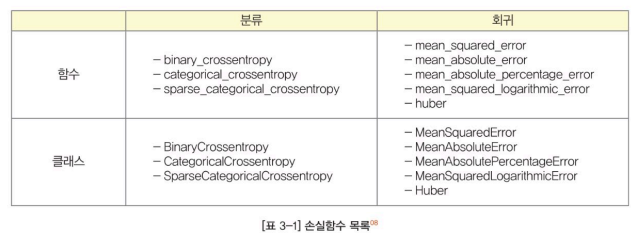




In [ ]:
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()

#함수(둘 다 가능!)
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy>

#### 1-1-5 경사하강법(gradient descent)

경사하강법: 딥러닝 모델 훈련 시 모델 내부의 **가중치에 대한 미분 값**을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

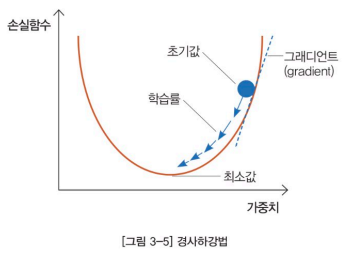

<Numpy로 경사하강법 구현>

1.  손실함수(Loss Function)을 다음과 같이 정의

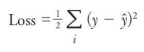

1/2은 가중치에 대한 그래디언트(gradient)를 계산하기 쉽도록 추가된 상수 값

2.  단순 선형회귀 수식이 y = wx+b 일 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현

3. y 값을 생성할 때 약간의 노이즈 추가

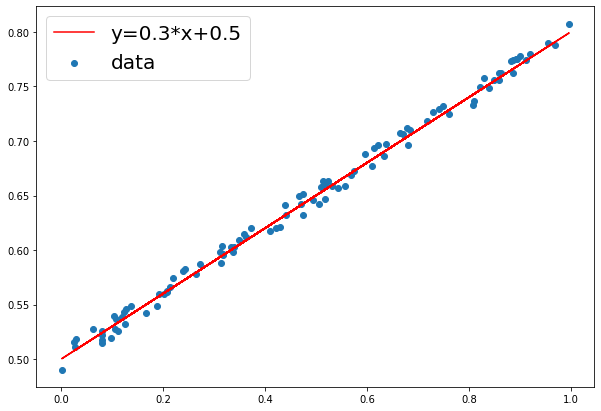

w: 0.3, b: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w*x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r', label=f'y={w}*x+{b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w: {w}, b: {b}')
  return x, yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

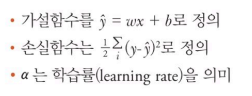

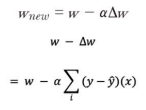

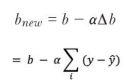

In [ ]:
#최대 반복 횟수
num_epoch = 1000

#학습률(learning_rate)
learning_rate = 0.005

#에러 기록
errors = []

#random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  #Hypothesis 정의
  y_hat = w*x + b
  
  #Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error<0.005:
    break

  #Gradient 미분 계산
  w = w - learning_rate*((y_hat-y)*x).sum()
  b = b - learning_rate*(y_hat-y).sum()

  errors.append(error)
  
  if epoch%5 == 0 :
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.69900, b = 0.49460 error = 13.17922
 5 w = 0.57326, b = 0.36567 error = 0.32010
10 w = 0.53151, b = 0.38514 error = 0.22994
15 w = 0.49664, b = 0.40269 error = 0.16575
20 w = 0.46709, b = 0.41757 error = 0.11962
25 w = 0.44204, b = 0.43018 error = 0.08648
30 w = 0.42080, b = 0.44087 error = 0.06267
35 w = 0.40280, b = 0.44994 error = 0.04556
40 w = 0.38755, b = 0.45762 error = 0.03326
45 w = 0.37461, b = 0.46413 error = 0.02442
50 w = 0.36365, b = 0.46965 error = 0.01808
55 w = 0.35435, b = 0.47433 error = 0.01351
60 w = 0.34647, b = 0.47830 error = 0.01024
65 w = 0.33980, b = 0.48166 error = 0.00788
70 w = 0.33414, b = 0.48451 error = 0.00619
------------------------------------------------------------
75 w = 0.3, b = 0.5 error = 0.00497


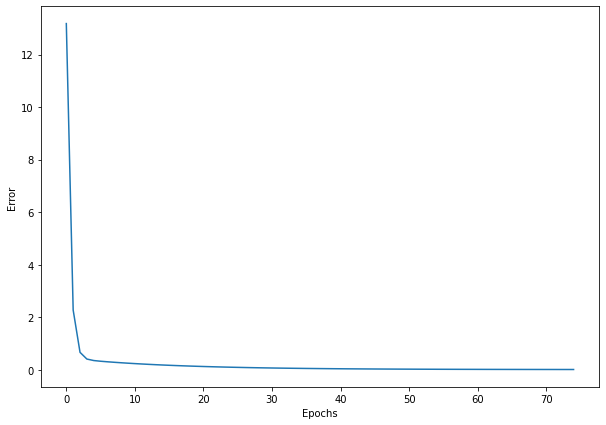

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show() #매번 실행마다 수렴하는 속도는 다르지만, 종료 후 w, b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w, b 계수와 비슷한 값임

### 1-2 딥러닝 프로세스

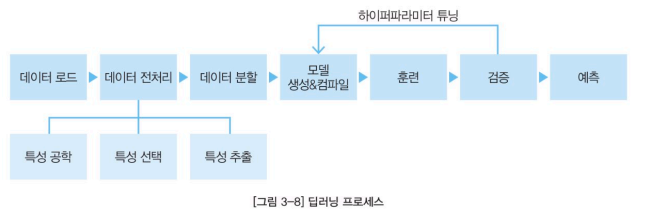

#### 1-2-1 데이터 전처리

데이터를 모델에 주입하기 전 데이터를 가공하는 단계. 때에 따라 배열의 차원을 변경하거나 스케일을 조정할 수 있음

#### 1-2-2 모델 생성

모델의 구조를 정의하고 생성하는 단계. 순차적인 구조 - Sequential API / 다중 입력 및 출력으로 복잡한 구조를 갖는 모델 - Functional API or Model Subclassing


#### 1-2-3 모델 컴파일

모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등읠 정의. 모델 인스턴스에 compile() 메소드 적용

#### 1-2-4 모델 훈련

fit() 함수에 모델 훈련에 필요한 정보인 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등을 매개변수로 전달

#### 1-2-5 모델 검증

모델을 훈련할 때 사용하지 않은 검증 데이터 셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산. 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가

#### 1-2-6 모델 예측

훈련과 검증이 완료된 모델로 테스트셋을 예측하고 그 결과를 반환

## 02. 단순 신경망 훈련

### 2-1 선형회귀

Simple Linear Regression 모형: 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있음

y = wx + b 에서

가중치 w와 편향 b를 업데이트하면서 y에 가장 근사한 1차 함수식을 완성해 나감

### 2-2 뉴런(Neuron)

뉴런: 인공 신경망 모델을 구성하는 하나의 신경(node)

신경망은 여러 개의 layer를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성. 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트 됨

** 역전파 알고리즘: 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법. 역전파는 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장함


### 2-3 Dense 레이어

Dense 레이어: 심층 신경망 모델을 구성하는 가장 기본 레이어. 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층(**Fully Connected Layer**)이라고 부르기도 함

<4개의 Dense 레이어로 구성된 모델>

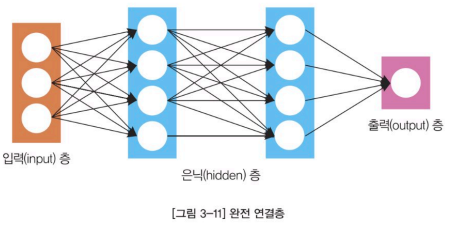

- 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개
- 모든 뉴런들이 정보의 흐름을 나타내는 화살표로 연결되어 있어 Fully Connected Layer

Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정할 수 있음


In [ ]:
import tensorflow as tf

#10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### 2-4 데이터셋 만들기

In [ ]:
#샘플 데이터셋 생성
x = np.arange(1,6)

#y = 3x+2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


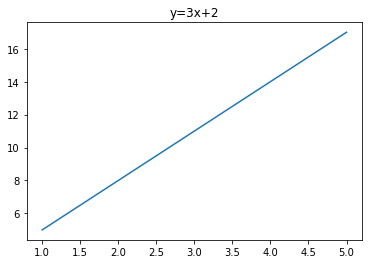

In [ ]:
import matplotlib.pyplot as plt

#시각화
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

### 2-5 Sequential API

Sequential API: 입력 레이어부터 출력 레이어까지 순서대로 층을 이어 붙이듯이 시퀀스에 맞게 일렬로 연결

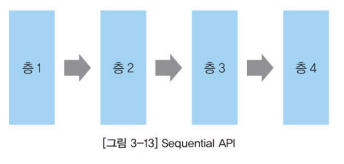

단점: 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다

#### 2-5-1 모델 구조

두가지 방법으로 Sequential API를 사용한 모델을 생성할 수 있음

In [ ]:
#리스트형
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(5),
                             tf.keras.layers.Dense(1),
])

In [ ]:
#add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#쌓고자 하는 레이어 개수의 제한 없음

#### 2-5-2 입력 데이터 형태

Sequential API를 사용하여 모델을 구성할 때 반드시 첫번째 층은 input_shape 매개변수를 지정해야 함(튜플, 리스트 등)

In [ ]:
model = tf.keras.Sequential([
                             #입력 데이터의 shape=(150,4)인 경우 input_shape 지정
                             tf.keras.layers.Dense(10, input_shape=[4]),
                             tf.keras.layers.Dense(5),
                             tf.keras.layers.Dense(1),
])

데이터셋의 shape이 (150,4)이면 150개 샘플에 대하여 4개의 입력 변수가 존재한다는 의미

#### 2-5-3 단순선형회귀 모델 정의

단순선형회귀: 1개의 뉴런을 가지는 Dense 레이어 한개 사용. 1개의 뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 가짐

In [ ]:
#단순선형회귀 모델 생성
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1,input_shape=[1])
])

Dense 레이어는 디폴트가 use_bias=True로 상수항 b가 추가됨

### 2-6 모델 요약

모델의 구조, 층별 노드의 개수, 훈련 시 업데이트할 파라미터의 개수 표기

In [ ]:
#모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Total params: 모델 내부에 존재하는 모든 파라미터의 합계
Trainable params: 모델 훈련 시 업데이트할 파라미터의 총 개수

### 2-7 컴파일

모델의 훈련 과정에 적용할 옵티마이저, 손실함수, 평가지표 정의. 3가지 방법으로 지정할 수 있음

In [ ]:
#긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
#짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
#클래스 인스턴트 지정(learning rate, momentum 등의 하이퍼파라미터 사용자가 직접 지정)
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), #확률적 경사하강법
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 2-8 훈련

fit() 메소드를 적용해 가중치(weight) 텐서를 업데이트 하는 과정

In [ ]:
#verbose=0 옵션 지정하면 훈련 중간 과정 출력하지 않음
#validation_data 옵션을 지정하면 검증 셋에 대한 손실과 평가지표도 함께 출력

model.fit(x,y,epochs=5) #과소적합 상태

Epoch 1/5
1/1 [==============================] - 1s 635ms/step - loss: 181.6202 - mae: 12.5293
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 105.9074 - mae: 9.6023
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 61.7852 - mae: 7.3677
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 36.0725 - mae: 5.6617
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 21.0880 - mae: 4.3593


In [ ]:
#단순선형회귀 모델 생성
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1,input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
history = model.fit(x, y, epochs=1200) #history 변수에 epoch별 훈련 손실과 평가지표가 딕셔너리 형태로 저장

Epoch 1/1200
1/1 [==============================] - 1s 572ms/step - loss: 39.9690 - mae: 6.0299
Epoch 2/1200
1/1 [==============================] - 0s 10ms/step - loss: 23.4627 - mae: 4.6627
Epoch 3/1200
1/1 [==============================] - 0s 8ms/step - loss: 13.8426 - mae: 3.6189
Epoch 4/1200
1/1 [==============================] - 0s 7ms/step - loss: 8.2353 - mae: 2.8218
Epoch 5/1200
1/1 [==============================] - 0s 7ms/step - loss: 4.9665 - mae: 2.2131
Epoch 6/1200
1/1 [==============================] - 0s 7ms/step - loss: 3.0605 - mae: 1.7483
Epoch 7/1200
1/1 [==============================] - 0s 7ms/step - loss: 1.9486 - mae: 1.3932
Epoch 8/1200
1/1 [==============================] - 0s 7ms/step - loss: 1.2995 - mae: 1.1220
Epoch 9/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.9202 - mae: 0.9147
Epoch 10/1200
1/1 [==============================] - 0s 29ms/step - loss: 0.6980 - mae: 0.7563
Epoch 11/1200
1/1 [==============================] - 0s 8ms/st

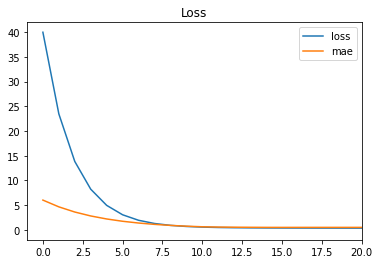

In [ ]:
#history 변수 사용하여 epoch 별 훈련 손실 및 평가 지표 시각화
import matplotlib.pyplot as plt

#20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

### 2-9 검증

In [ ]:
model.evaluate(x,y)

1/1 [==============================] - 0s 355ms/step - loss: 1.2280e-04 - mae: 0.0095


[0.00012279700604267418, 0.009511470794677734]

** cross-validation: 사전에 별도로 검증 데이터셋을 준비하여 모델 성능을 평가하는 방법(홀드아웃, K-Fold 교차 검증 등)

### 2-10 예측

훈련이 완료된 모델 인스턴스의 predict() 메소드에 새로운 입력 데이터를 넣어주면 모델의 예측값을 얻을 수 있음

In [ ]:
model.predict([10])

array([[32.04597]], dtype=float32)

(10,32)이므로 정답에 꽤 근사한 값을 예측한 것을 확인할 수 있음

## 03. 심층 신경망으로 이미지 분류

### 3-1 케라스 내장 데이터셋 로드

- boston_housing: 보스톤 주택 가격 데이터셋(회귀)
- cifar10: CIFAR10 이미지 분류 데이터셋(분류)
- cifar100: CIFAR100 이미지 분류 데이터셋(분류)
- mnist: mnist 손글씨 데이터셋(분류)
- fashion_mnist: 의류 데이터셋(분류)
- imdb: IMDb 영화 데이터셋(분류)
- reuters: Reuters 뉴스 토픽(분류)

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [ ]:
#튜플 형태로 정의
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


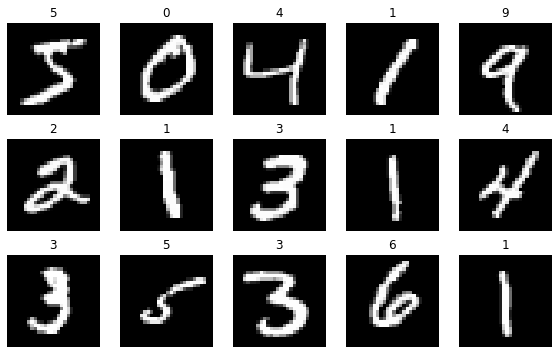

In [ ]:
#데이터 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  #imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2 데이터 전처리

In [ ]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [ ]:
#픽셀 값의 최소/최대값 확인
print(f'정규화 전 최소값: {x_train.min()}, 최대값:{x_train.max()}')

#데이터 정규화
x_train = x_train / x_train.max()

#정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전 최소값: 0, 최대값:255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [ ]:
#test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3-3 Flatten 레이어

Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 하므로 Flatten 전처리가 필수

In [ ]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [ ]:
print(f'변경 전 shape: {x_train.shape}')
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4 활성화 함수

활성화 함수(Activation Function): 입력을 비선형 출력으로 변환해주는 함수. 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 함

ex) Sigmoid, Hyperbolic Tangent, ReLu, Leaky ReLU

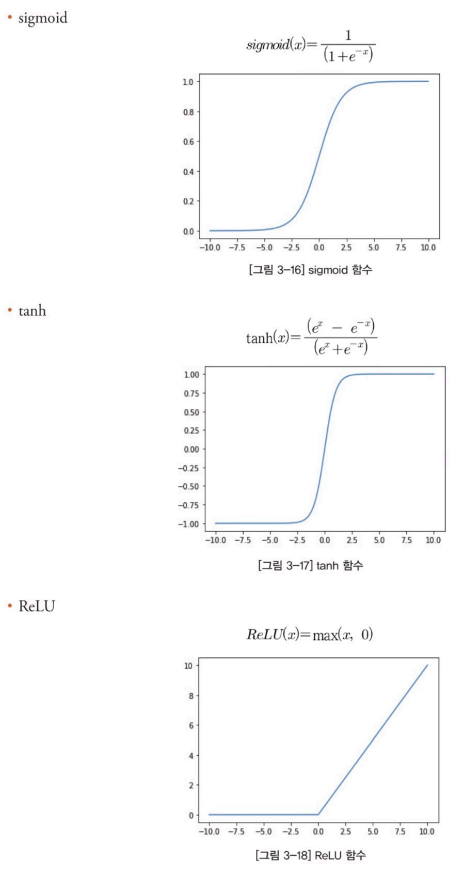

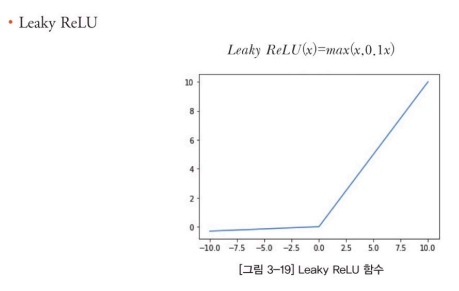

In [ ]:
#Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [ ]:
#Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
#Dense 레이어 다음에 Batch Normalization을 적용한 후 활성화 함수를 적용하고자 할 때 주로 사용
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128),
                             tf.keras.layers.Activation('relu')
])

### 3-5 입력과 출력

- x_train의 shape은 (60000, 28, 28)이므로 input_shape=(28,28)로 지정
- 출력층의 노드 개수 = 분류해야 할 클래스의 개수

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(32, activation='relu'),
                             #노드 = 10개(클래스 개수와 동일)
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

#출력층 노드 = 2인 경우, softmax
#이진 분류 모델이더라도 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우 softmax 함수 이용
tf.keras.layers.Dense(10, activation='softmax')

### 3-6 손실함수

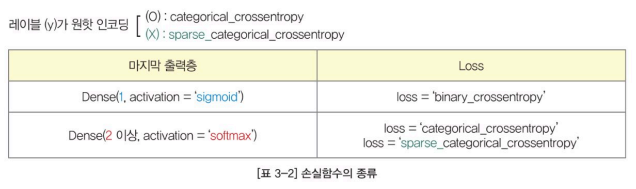

In [ ]:
#이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [ ]:
#y가 원핫 벡터인 경우
model.compile(loss='categorical_crossentropy')

#y가 원핫 벡터가 아닌 경우 #[5]
model.compile(loss='sparse_categorical_crossentropy')

### 3-7 옵티마이저

옵티마이저(optimizer): 손실을 낮추기 위해서, 신경망의 가중치, 학습률 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법

ex) SGD, Adam, Adagrad, Nadam ...

In [ ]:
#클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 3-8 평가지표

분류 모델 평가지표: 'accuracy', 'precision', 'recall' 등

In [ ]:
#클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = [acc])

In [ ]:
#문자열로 지정
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### 3-9 훈련

In [ ]:
model.fit(x_train, y_train,
          #검증 셋 지정(투플 형태)
          validation_data = (x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2269 - accuracy: 0.9326 - val_loss: 0.1148 - val_accuracy: 0.9653
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0939 - accuracy: 0.9710 - val_loss: 0.0832 - val_accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.0982 - val_accuracy: 0.9691
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9836 - val_loss: 0.0870 - val_accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.0886 - val_accuracy: 0.9737
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0757 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0271 - accuracy: 0.9910 - val_loss: 0.1127 - val_accuracy

### 3-10 평가

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9763
검증 셋 정확도: 0.9763000011444092


### 3-11 예측

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0]

array([6.8079272e-13, 2.5931757e-10, 2.9061806e-10, 6.7640769e-09,
       8.6045216e-12, 1.7567489e-15, 3.5203161e-18, 9.9999976e-01,
       2.3005120e-11, 2.8371122e-07], dtype=float32)

In [ ]:
#softmax 활성화함수를 거친 10개의 출력값은 순차적으로 0~9까지의 10개의 개별 클래스에 대한 분류 확률값을 나타냄
import numpy as np

#0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))


7
[7 2 1 0 4 1 4 9 5 9]


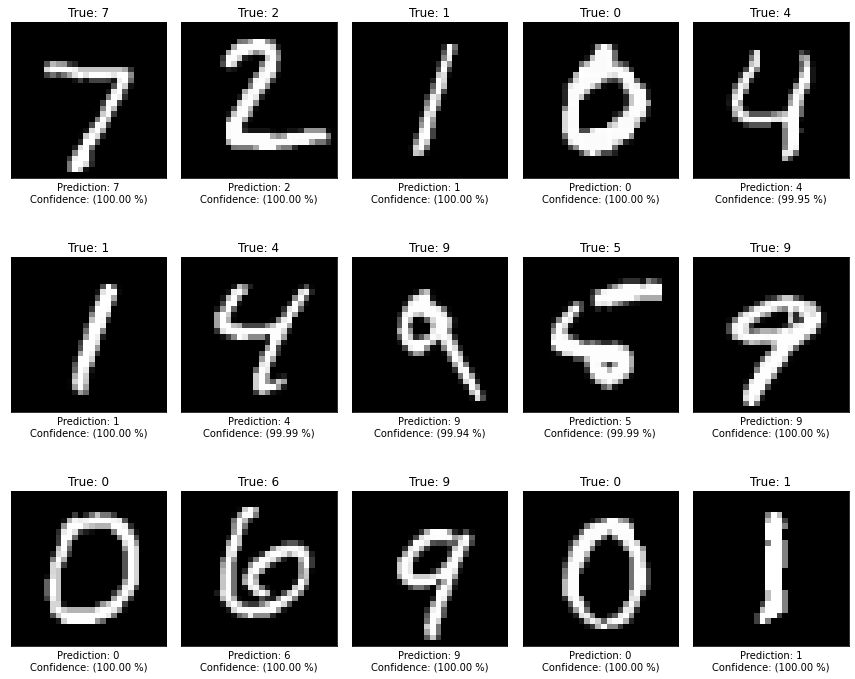

In [ ]:
#데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  #imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()